# Flamespeed 

#### Bernard Kleynhans, Tim Lee, Yaniv Toledano (Group 14)


***

# 1. Installation

**Flamespeed can easily be installed using PyPI**

```bash
pip install flamespeed
```

# 2. Getting started

### Import package

In [2]:
from IPython.display import Image
from flamespeed import chemkin

### Instantiate class and import reaction data

In [2]:
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base.xml')
print(fs)

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']



### Calculate reaction rate for system of elementary, irreversible reactions

In [3]:
# Specie concentrations
conc = [0.5, 1, 2, 2, 0, 1]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates:


['H: -9.7109E+04',
 'O: 1.0111E+05',
 'OH: 2.6978E+05',
 'H2: -9.0335E+04',
 'H2O: 4.0000E+03',
 'O2: -1.8744E+05']

### Mix it up with some reversible reactions

In [4]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_mixed.xml')
print(fs)

Number_of_reactions:11                     
Number_of_species:8                     
Number_of_reversible_reactions:2                     
Reversible:Some                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']



In [5]:
# Specie concentrations
conc = [0.5, 1, 1, 2, 0, 1, 1, 2]

# Set temperature
fs.set_temp(250)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates:


['H: -4.0624E+13',
 'O: -3.2625E+13',
 'OH: 6.0693E+13',
 'H2: 6.2793E+12',
 'H2O: 4.0622E+13',
 'O2: 7.4728E+13',
 'HO2: -1.0428E+14',
 'H2O2: -4.7978E+12']

### And some other species

In [6]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_species.xml')
print(fs)

Number_of_reactions:2                     
Number_of_species:5                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['N', 'N2', 'H', 'NH', 'NH2']



In [7]:
# Specie concentrations
conc = [0.5, 1, 1, 2, 0]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates:


['N: -3.8568E+05',
 'N2: 3.7489E+05',
 'H: 3.5330E+05',
 'NH: -3.7489E+05',
 'NH2: 1.0792E+04']

# 3. New features

## Unit Conversion

### What Units?

#### Where do units play a role?

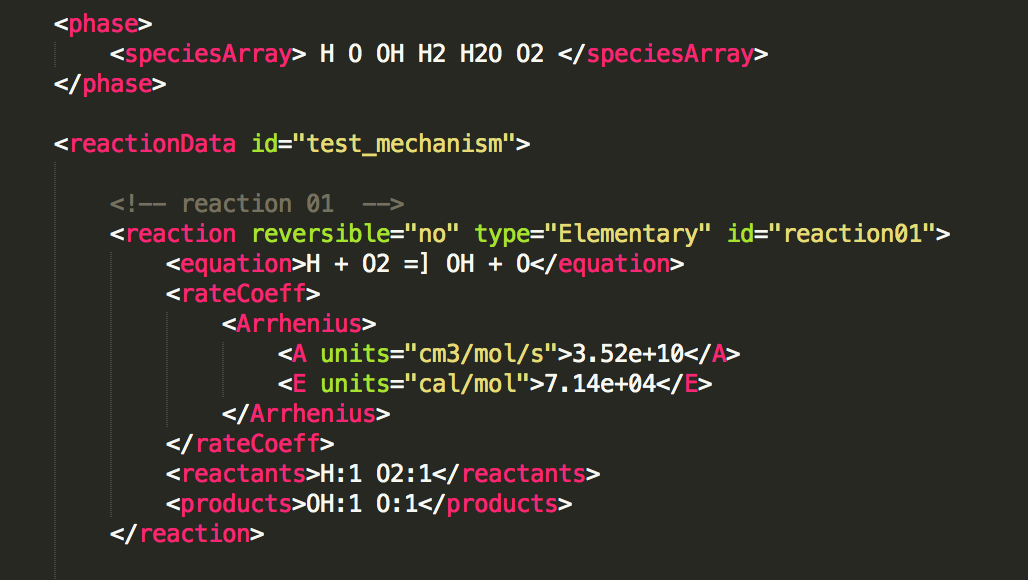

In [3]:
Image('images/units_image.png')

We see that the **Arrhenius prefactor "A"** and **activation energy "E"** have units which are not necessarily SI and, for that matter, not necessarily consistent either. To make sure all units are consistent, and as such make sure the results make sense, we convert units to SI and specifically m / J / mol.

#### User-friendly unit conversion

In [32]:
import pandas as pd
df = pd.read_csv('files/units.csv')
df

,Unit,Conversion
0,cal,4.184000e+00
1,kcal,4.184000e+03
2,kJ,1.000000e+03
3,yd,9.144000e-01
4,ft,3.048000e-01
5,cm,1.000000e-02
6,mm,1.000000e-03
7,cm3,1.000000e-06
8,dm3,1.000000e-03
9,L,1.000000e-03


### Convert Units True or False?

#### Setting the conversion to False

In [29]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units.xml', convert_units=False)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates with unconverted units:


['H: -4.7400E+05',
 'O: 4.7600E+05',
 'OH: 6.4667E+05',
 'H2: -8.8335E+04',
 'H2O: 2.0000E+03',
 'O2: -5.6233E+05']

#### Setting the conversion to True

In [30]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units.xml', convert_units=True)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates with unconverted units:


['H: 2.0000E+03',
 'O: -1.2711E-07',
 'OH: -2.0000E+03',
 'H2: -2.0000E+03',
 'H2O: 2.0000E+03',
 'O2: -8.2624E-17']

### Unit Conversion if No Units Are Specified

#### Example Input File

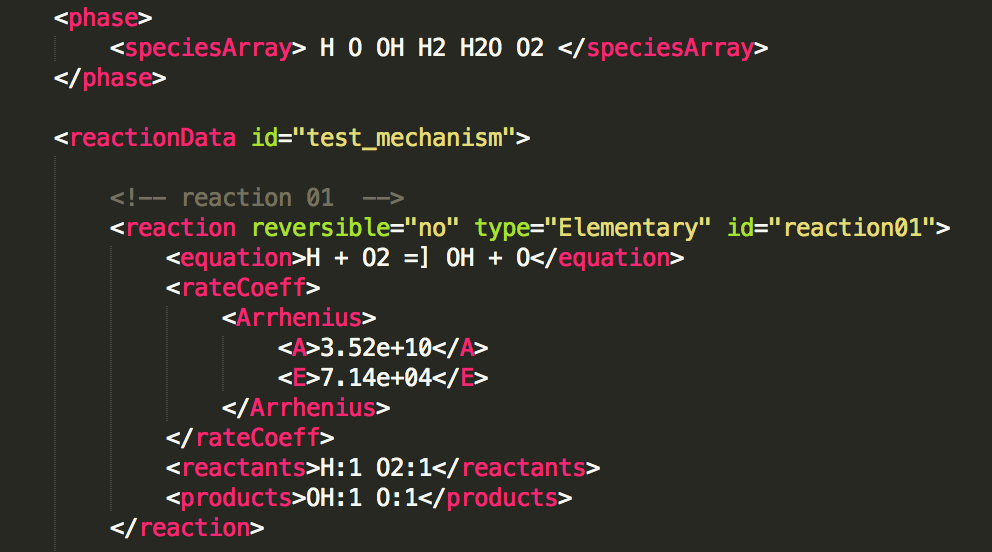

In [40]:
Image('images/no_units_image.png')

#### Running Code With Convert_Units = True

In [48]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns.xml', convert_units=True)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

ValueError: Input file contains no units. Set convert_units to False to continue

#### Running Code With Convert_Units = False

In [49]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns.xml', convert_units=False)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']

Reaction rates with unconverted units:


['H: -4.7400E+05',
 'O: 4.7600E+05',
 'OH: 6.4667E+05',
 'H2: -8.8335E+04',
 'H2O: 2.0000E+03',
 'O2: -5.6233E+05']

### Unit Conversion If Unit Is Not Implemented

#### Example Input File

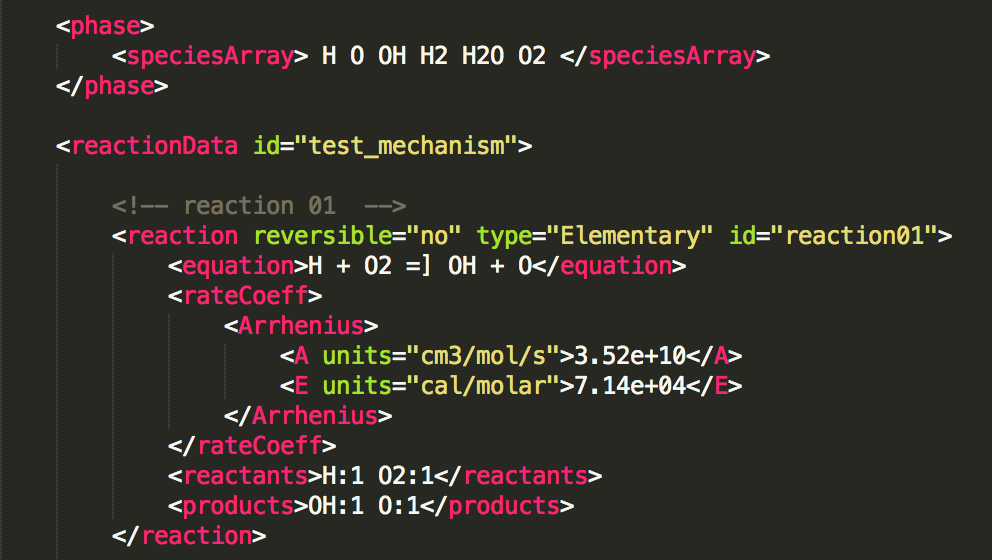

In [45]:
Image('images/unimplemented_unit_image.png')

#### Running Code With Convert_Units = True

In [50]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units_2.xml', convert_units=True)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

NotImplementedError: molar not implemented.

#### Running Code With Convert_Units = False

In [51]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_units_2.xml', convert_units=False)
print(fs)

# Specie concentrations
conc = [0.5, 1, 1, 2, 2, 3]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates with unconverted units:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']

Reaction rates with unconverted units:


['H: -4.7400E+05',
 'O: 4.7600E+05',
 'OH: 6.4667E+05',
 'H2: -8.8335E+04',
 'H2O: 2.0000E+03',
 'O2: -5.6233E+05']